In [1]:
import os
os.getcwd()

'/home/khalid/Desktop/BDP2'

# Web Scraping
Welcome to assignment-2-part-1 for the BDA course where you will create a simple web scraping script. The goal of this data collection exercise is to get information about squads who participated in the [Asian cup finals](https://en.wikipedia.org/wiki/AFC_Asian_Cup) from 1984 to present. For each squad, you  will retrieve information about the name of the team, list of all players in the team so that the final output will look like below.

By the end of the asssignment, you will have accomplished the common task of web scraping as follows:
- use requests package to retrive data drom a url
- use BeautifulSoup to extract required elements from html
- use your Python knowledge to clean up the strings, put everything together and  save data into a CSV

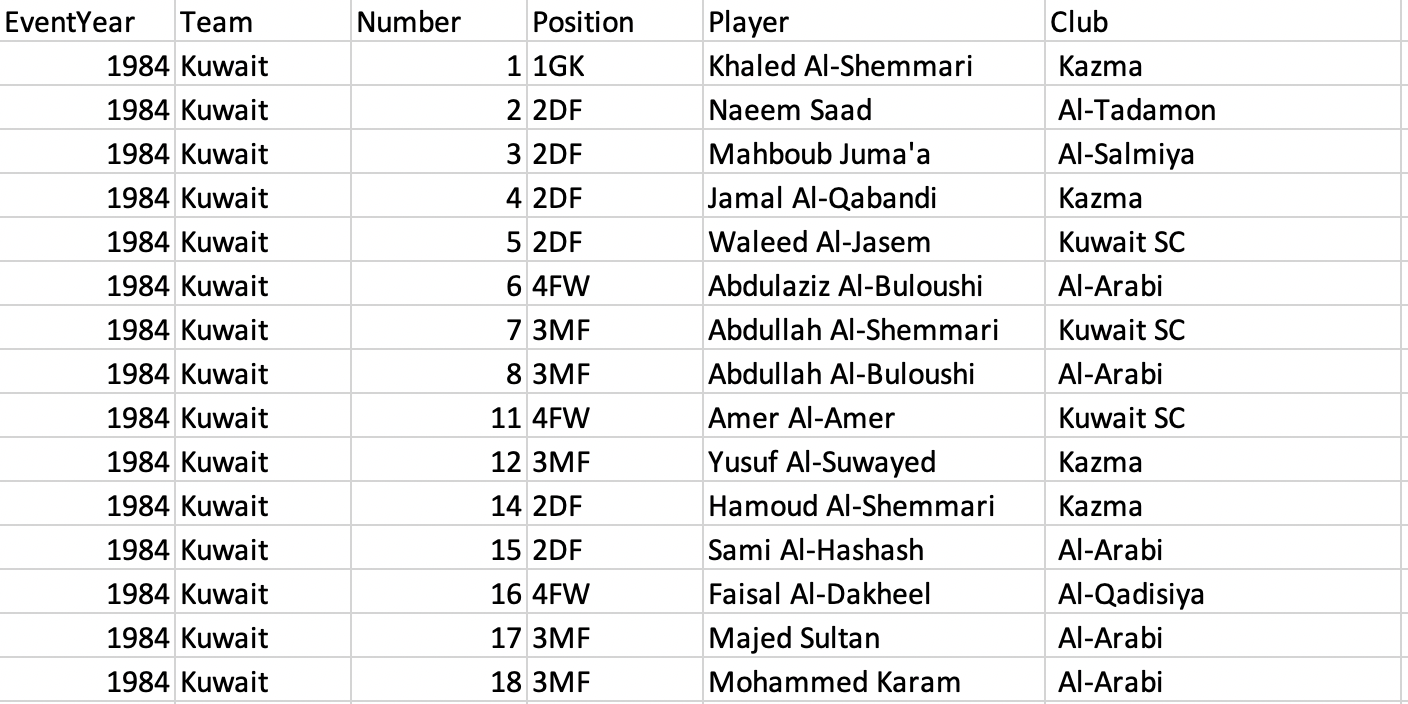

In [2]:
from IPython.display import Image
Image("/home/khalid/Desktop/BDP2/assignment-2-outputs.png", width=550)

## Python setup

In [1]:
# import other packages you need for this assignment
import re
import numpy as np
from IPython.display import Image
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
help(BeautifulSoup.select)

Help on function select in module bs4.element:

select(self, selector, namespaces=None, limit=None, **kwargs)
    Perform a CSS selection operation on the current element.
    
    This uses the SoupSieve library.
    
    :param selector: A string containing a CSS selector.
    
    :param namespaces: A dictionary mapping namespace prefixes
       used in the CSS selector to namespace URIs. By default,
       Beautiful Soup will use the prefixes it encountered while
       parsing the document.
    
    :param limit: After finding this number of results, stop looking.
    
    :param kwargs: Keyword arguments to be passed into SoupSieve's 
       soupsieve.select() method.
    
    :return: A ResultSet of Tags.
    :rtype: bs4.element.ResultSet



## 1-List of urls containing squad information

In [3]:
# identify base url for wiki and add it here 
base_wiki_url ='https://en.wikipedia.org'
base_afc_url = 'https://en.wikipedia.org/wiki/AFC_Asian_Cup'

In [4]:
def retrieve_yearly_squad_urls(url, wiki_base_url):
    """
    Extracts url links for squads from 1984 to present as required.
    Arguments:
    url -- base_afc_url
    wiki_base_url -- base/root url for wiki which we combine with relative url 
    
    """
    # Use requests and BS to create a BS object
    # as we did in class
    # please 
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    
    # Extract urls with squad in them using this function: select("a[href*=squads]")
    # on the soup object
    squad_links =soup.select("a[href*=squads]")
    
    # dictionary to hold the urls info
    squad_links_1984_later = {}#None
    
    # Loop through list of urls in squad_links and do the following:
    # 1. extract yr 
    # 2. extract the actual url(link) which you use later 
    # 3. Create a full url by combining thee years squads url and wiki base url
    # 4. Keep in the output list squad_links_1984_later only urls for 1984 and later
    # 5. When adding in the squad_links_1984_later, use yr as key
    ### START YOUR FOR LOOP CODE HERE ### (≈7 lines)
    for link in squad_links:
        yr=(link.text)
        if int(yr)>=1984:
            actual_url=link.get('href')
            full_link = wiki_base_url+actual_url #.split("/")[-1]
            squad_links_1984_later[str(yr)]=full_link
    return squad_links_1984_later

#good

In [5]:
# call the retrieve_yearly_squad_urls above 
squad_links_1984_later =retrieve_yearly_squad_urls(url=base_afc_url, wiki_base_url=base_wiki_url)
squad_links_1984_later

{'1984': 'https://en.wikipedia.org/wiki/1984_AFC_Asian_Cup_squads',
 '1988': 'https://en.wikipedia.org/wiki/1988_AFC_Asian_Cup_squads',
 '1992': 'https://en.wikipedia.org/wiki/1992_AFC_Asian_Cup_squads',
 '1996': 'https://en.wikipedia.org/wiki/1996_AFC_Asian_Cup_squads',
 '2000': 'https://en.wikipedia.org/wiki/2000_AFC_Asian_Cup_squads',
 '2004': 'https://en.wikipedia.org/wiki/2004_AFC_Asian_Cup_squads',
 '2007': 'https://en.wikipedia.org/wiki/2007_AFC_Asian_Cup_squads',
 '2011': 'https://en.wikipedia.org/wiki/2011_AFC_Asian_Cup_squads',
 '2015': 'https://en.wikipedia.org/wiki/2015_AFC_Asian_Cup_squads',
 '2019': 'https://en.wikipedia.org/wiki/2019_AFC_Asian_Cup_squads',
 '2023': 'https://en.wikipedia.org/w/index.php?title=2023_AFC_Asian_Cup_squads&action=edit&redlink=1'}

## 2-Extract data from tables.
For each year of the AFC cup finals, e.g., 1956, you will note that the data is presented in the table.
Now, you need to creeate a function which can extract all the data from this data for this particular year.

In [6]:
help(BeautifulSoup.findChildren)

Help on function find_all in module bs4.element:

find_all(self, name=None, attrs={}, recursive=True, text=None, limit=None, **kwargs)
    Look in the children of this PageElement and find all
    PageElements that match the given criteria.
    
    All find_* methods take a common set of arguments. See the online
    documentation for detailed explanations.
    
    :param name: A filter on tag name.
    :param attrs: A dictionary of filters on attribute values.
    :param recursive: If this is True, find_all() will perform a
        recursive search of this PageElement's children. Otherwise,
        only the direct children will be considered.
    :param limit: Stop looking after finding this many results.
    :kwargs: A dictionary of filters on attribute values.
    :return: A ResultSet of PageElements.
    :rtype: bs4.element.ResultSet



In [7]:
def extract_data_from_table(table, yr, team):
    """
    Given an html table for a single year, extract all the data
    Arguments:
    table --  html table retrieved using BS
    yr -- year under consideration
    team -- team/country name
    
    """
    
    # Get all rows from the table using the function: findChildren()
    # on the table object  with 'tr' as parameter
    rows =table.findChildren(['tr'])
#     print(rows)
    # List to hold the data 
    data = []
    
    # Loop through the rows and do the following:
    # 1. get cells from each row using function findChildren() with parameters 'td', 'th'
    # 2. Declare variables to hold information for player number, position and club
    # 3. Loop through eeach cell and do the following:
    # 1. Retrive text from the cell using text() function and remove 
    # "\n" with function strip()
    # 2. After some cleaning, set player number, position and club to text retrieved
    
    # first for loop (use row the counter variable) to keep with my variable naming below
    for row in rows:
        try:
            cells =row.findChildren(['td','th'])
            num, pos, name, club =None, None, None,None 
            # second for loop use enumerate with i, cell as counter variables
            for i,cell in enumerate(cells):
                txt =cell.text.strip('\n')
                if i == 0:
                    try:
                        # convert to integer
                        num = int(txt)
                    except:
                        if txt == " ":
                            num = np.nan
                elif i == 1:
                    pos = txt
                elif i == 2:
                    name = txt
                elif i == 6:
                    club = txt
            # dictionary which holds the data we need for EventYear, team name, player number
            # position, name and club
            item = {'EventYear': yr,'Team name': team, 'Player number':num, 'Position':pos, 'Name':name, 'Club':club}

            data.append(item) 
        except:
            pass
        # add the item to the data list using append() method

    # return the list of data
    return data
#good

In [8]:
# url = 'https://en.wikipedia.org/wiki/1984_AFC_Asian_Cup_squads'
# yr=1984
# team ='AFC_Asian_Cup_squads'
# req = requests.get(url)
# table=BeautifulSoup(req.text, 'lxml').find_all('table')[2]
# data= extract_data_from_table(table, yr, team)
# print(data)

## 3-Put it all together. $\color{red}{MARKED}$
First, you need a function to take url for a single year, extract data from that url using 
```extract_data_from_table()``` function you defined above and repeat this for all all years.

In [9]:
def get_single_year_data(yr, yr_url):
    """
    Given url for a single year, retrieve the data
    Arguments:
    yr -- year under consideration
    yr_url --url to get data for this year
    
    """
    # create a response and soup object using the yr_url
    response = requests.get(yr_url)
    soup =BeautifulSoup(response.text, 'lxml')
    
    # keep all team names for tthiss year in the list
    team_names =[]
    
    # Loop through all soup items which are links and 
    # get the team name
    # use soup.find_all() and add necessary parameters to retrieve
    # urls
    
    # for loop with a as the counter variable 
    for a in soup.find_all('a'):
        try:
            # get title of element
            title = a.get('title')
            # add to team names lits only if text "national football team"
            # is in the title (about 2 lines of code)
            if "national football team" in title:
                team_names.append(title)
            
        except:
            pass
#     print(team_names)
    # extract all tables from the soup object using findAll() function
    # and the appropriate tag
    tables =soup.find_all('table')
   
    # List to keep all data
    all_data =[]
    
    # Loop through all tables and do the following
    # 1. Get the table object
    # 2. Use extract_data_from_table() to extract data from this table
    # 3. Add the retrieved data to the list all_data declared above
    # Hint: use enumerate with team_name sfor the loop to help with getting table and
    # team name 
    # about 3 lines of code
    for i , table in enumerate(tables):

        if i>=len(team_names):
            continue
        extrt = extract_data_from_table(table, yr, team=team_names[i])
        all_data.extend(extrt)
    
   # return the list of all_data# 
    return all_data

In [10]:
# l=[]
# for yr, yr_url in squad_links_1984_later.items():
#     all_=get_single_year_data(int(yr), yr_url)
#     l.extend(all_)


# df = pd.DataFrame(l)
# df.dropna(axis=0, inplace=True)
# df

In [11]:
def scrape_save_data(squad_links, output_csv):
    """
    Helper function to put everything together and save the data
    Arguments:
    squad_links -- url list for squadss for eeeach year wee retrieved above
    output_csv -- full path to save the results 
    """
    
    # List to hold the data
    List_data =[]
    
    # Loop through all urls in squad_links (~ 3 lines)
    # 1. Get data for that year using the appropriate function
    # 2. Add the data to thee elist above
    for yr, yr_url in squad_links.items():
            data_for_year = get_single_year_data(int(yr), yr_url)
            List_data.extend(data_for_year)

    # Create a dataframe using the data object above (~1 line)
    
    df = pd.DataFrame(List_data)
    
    # Clean up by removing unwanted rows (~1 line)
    df.dropna(axis=0, inplace=True)
    # save results in CSV
    df.to_csv(output_csv)

In [12]:
# Call your function here
output_csv="/home/khalid/Desktop/BDP2/Out_put/Asian_cup_finals.csv"
squad_links=squad_links_1984_later
scrape_save_data(squad_links, output_csv)

## Congratulations on completing this part of assignment!
Here some notes on how the assingment will be marked. Full marks will be 
achieved based on two main criteria:
- Code is able to run 
- The results (output CSV) is accurate, matches with what I have

In [6]:
df = pd.read_csv(output_csv)
df.head(10)

,Unnamed: 0,EventYear,Team name,Player number,Position,Name,Club
0,1,1984,Kuwait national football team,1.0,1GK,Khaled Al-Shemmari,Kazma
1,2,1984,Kuwait national football team,2.0,2DF,Naeem Saad,Al-Tadamon
2,3,1984,Kuwait national football team,3.0,2DF,Mahboub Juma'a,Al-Salmiya
3,4,1984,Kuwait national football team,4.0,2DF,Jamal Al-Qabandi,Kazma
4,5,1984,Kuwait national football team,5.0,2DF,Waleed Al-Jasem,Kuwait SC
5,6,1984,Kuwait national football team,6.0,4FW,Abdulaziz Al-Buloushi,Al-Arabi
6,7,1984,Kuwait national football team,7.0,3MF,Abdullah Al-Shemmari,Kuwait SC
7,8,1984,Kuwait national football team,8.0,3MF,Abdullah Al-Buloushi,Al-Arabi
8,9,1984,Kuwait national football team,11.0,4FW,Amer Al-Amer,Kuwait SC
9,10,1984,Kuwait national football team,12.0,3MF,Yusuf Al-Suwayed,Kazma
